# 고용, 소득으로 알아본 저소득층 복지

- 2022년 기준 국가별 행복 순위 1위부터 핀란드, 덴마크, 아이슬란드, 유럽 등 최상위 국가군 차치, 프랑스(20위), 한국(54위)  
- 저소득층으로 이동한 가구는 빈곤층에서 벗어나지 못할 확률이 높고 중산층 붕괴되는 경향  
- **사회적 불평등, 계층 이동 관점으로 시각 확대**

### 참조

- [나무위키 검색ㅡ저소득층](https://namu.wiki/w/저소득층)
- [e-나라지표](https://www.index.go.kr/unify/idx-info.do?idxCd=8065)

In [119]:
import welfare
from IPython import display

---
## <span style='color:#7eb54e'>welfare</span> 데이터베이스 설계

- 국가 <span style='color:blue'>country</span>를 세가지 데이터의 <span style='color:blue'>**주요 공통키</span>로 설정
- <span style='color:#7eb54e'>**국가별 저소득층 소득**</span> 데이터(2017~2021) : <span style='color:blue'>global_income</span>
- <span style='color:#7eb54e'>국가별 실업률</span> 데이터(2017~2021) : <span style='color:blue'>**unemployment_rate</span>
- <span style='color:#7eb54e'>국가별 사회적 지출비용</span> 데이터(2019) : <span style='color:blue'>**social_spending**</span>

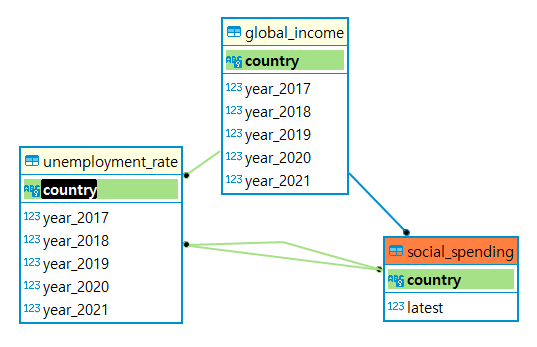

In [117]:
display.Image('Data/img/welfareDB설계.png')

In [111]:
# 네이버 검색키워드1 "소득지원정책" 관련 게시글 제목 추출 
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%86%8C%EB%93%9D%EC%A7%80%EC%9B%90%EC%A0%95%EC%B1%85'
title = welfare.scrap(url, tag='a', cls_name=['total_tit', 'link_tit'])
title = title[0]

# 네이버 검색키워드2 "저소득 지원" 관련 게시글 제목 추출 
url = 'https://search.naver.com/search.naver?where=nexearch&sm=tab_jum&query=%EC%A0%80%EC%86%8C%EB%93%9D+%EC%A7%80%EC%9B%90'
title2 = welfare.scrap(url, tag='a', cls_name=['total_tit', 'news_tit'])
title2 = title2[0]
title.extend(title2)

# 네이버 "저소득" 및 "소득지원정책" 키워드 wordcloud 이미지 저장 및 출력
exkwrd = ['저소득', '저소득층', '소득', '지원', '정책', '소득지원정책']
welfare.mkWordCloud(title, exkwrd, '소득지원정책')

# youtube 검색키워드 "저소득층 지원" wordcloud 이미지 저장 및 출력
url = 'https://www.youtube.com/results?search_query=%EC%A0%80%EC%86%8C%EB%93%9D%EC%B8%B5+%EC%A7%80%EC%9B%90&sp=CAMSBAgFEAE%253D'
youtube_title = welfare.scrap(url, xpath='//*[@id="meta"]')

exkwrd = ['소득층', '저소득층', '지원', '저소득층지원']
welfare.mkWordCloud(title, exkwrd, '저소득층지원')

# 데이터베이스에 데이터 저장
welfare.sendQuery('Data/global_income.csv', 'localhost', 'user0728', 'test1234', 'welfare', 'global_income')
welfare.sendQuery('Data/social_spending.csv', 'localhost', 'user0728', 'test1234', 'welfare', 'social_spending')
welfare.sendQuery('Data/unemployment_rate.csv', 'localhost', 'user0728', 'test1234', 'welfare', 'unemployment_rate')

---
## #청년, #월세, #생활, #목돈, #공제<span style='font-size: 50%'> 저소득층지원 관련 키워드</span>

- 소득과 관련된 내용이 당연히 가장 중점
- 생활과 직결된 요소들

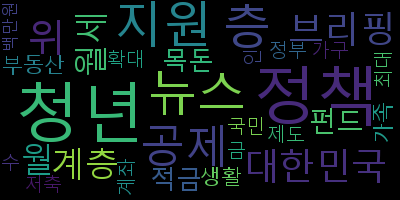

In [115]:
display.Image('Data/img/소득지원정책.png')

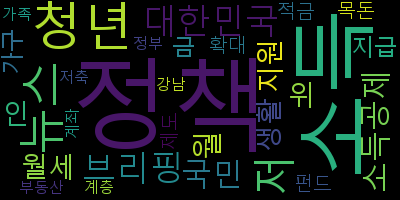

In [116]:
display.Image('Data/img/저소득층지원.png')

---

## 저소득층 소득 변화<span style='font-size: 60%'> Decile ratios of gross earnings</span>

- 출처 : [OECD iLibrary Decile ratios of gross earnings 2021](https://doi.org/10.1787/data-00302-en)
- 카테고리 : Home  Statistics  OECD Employment and Labour
- 상근 부양 직원의 총 소득에 대한 소득 상위 십분위수 한도, 중위 소득의 2/3 미만을 버는 근로자의 총 부양 고용에서 차지하는 비중

                year_2017  year_2018  year_2019  year_2020  year_2021
country                                                              
Australia           15.06      15.43      15.46       0.00       0.00
Canada              22.01      20.68      19.38      18.67      19.54
Denmark              8.52       8.73       0.00       0.00       0.00
France               0.00       7.74       0.00       0.00       0.00
Germany             18.21      17.83      17.64      16.98       0.00
Italy                0.00       3.71       4.89       0.00       0.00
Japan               12.32      12.12      11.79      10.88      10.66
Korea               22.30      19.04      16.96      15.96      15.63
Norway               0.00       0.00       0.00       0.00       0.00
Sweden               0.00       0.00       0.00       0.00       0.00
Switzerland          0.00      12.12       0.00      12.00       0.00
United Kingdom      18.98      18.96      18.06      18.02      16.66
United States       

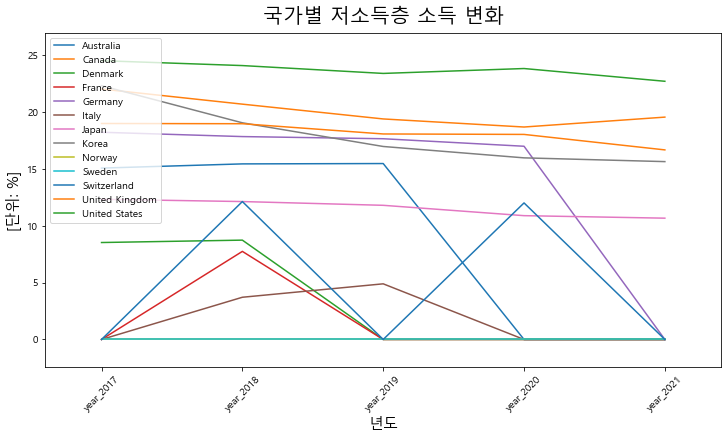

In [89]:
gbincome = welfare.getData('localhost', 'user0728', 'test1234', 'welfare', 'global_income')
gbincome.set_index('country', inplace=True)
gbincome = gbincome.astype('float')
print(gbincome)
welfare.plotgraph(gbincome, '국가별 저소득층 소득 변화', '년도', '[단위: %]', '/Data/img/저소득층소득변화.png')

---

## 실업률<span style='font-size: 60%'> Unemployment Rate</span>

- 출처 : [OECD Data](https://data.oecd.org)
- Employment 관련 데이터들은 1주일 30시간 미만 등 단시간 근로자 포함해서 단순 고용 여부를 지표화한 것들이 있어서 실업율 변화 데이터를 사용

                year_2017  year_2018  year_2019  year_2020  year_2021
country                                                              
Australia           5.594      5.300      5.159      6.462      5.116
Canada              6.400      5.892      5.733      9.558      7.467
France              9.425      9.025      8.433      8.033      7.883
Germany             3.567      3.208      2.975      3.625      3.575
Italy              11.258     10.600      9.933      9.300      9.558
Japan               2.808      2.442      2.350      2.775      2.817
Korea               3.683      3.833      3.783      3.942      3.675
OECD Total          5.940      5.494      5.421      7.162      6.161
United Kingdom      4.425      4.100      3.825      4.575      4.525
United States       4.350      3.900      3.667      8.092      5.367


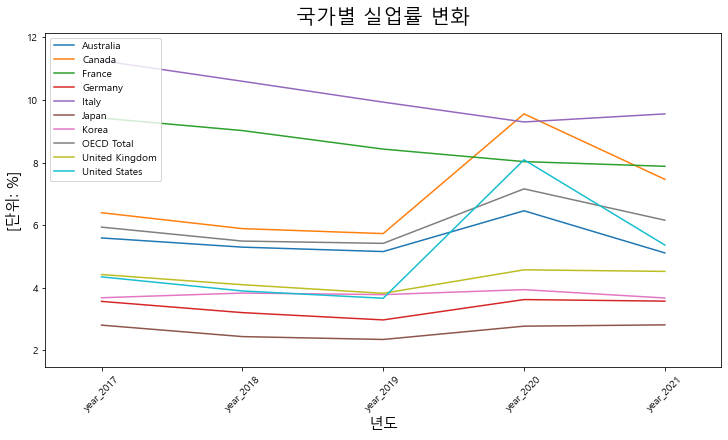

In [109]:
unemployment_rate = welfare.getData('localhost', 'user0728', 'test1234', 'welfare', 'unemployment_rate')
unemployment_rate.set_index('country', inplace=True)
unemployment_rate = unemployment_rate.astype('float')
print(unemployment_rate)
welfare.plotgraph(unemployment_rate, '국가별 실업률 변화', '년도', '[단위: %]', '/Data/img/국가별실업률변화.png')

---

## 사회적 지출<span style='font-size: 60%'> Social Pending</span>

- 출처 : [OECD Data](https://data.oecd.org/socialexp/social-spending.htm)
- 사회적 지출은 현금 혜택, 재화와 서비스의 직접적인 현물 제공, 사회적 목적을 위한 세제 혜택으로 구성
- 혜택은 저소득 가구, 노인, 장애인, 병자, 실업자 또는 청년을 대상
- 1인당 GDP 또는 USD의 백분율로 측정

                latest
country               
Australia       16.710
Canada          17.985
France          30.987
Germany         25.881
Italy           28.195
Japan           22.324
Korea           12.200
OECD Total      20.031
United Kingdom  20.616
United States   18.710


<Figure size 720x432 with 0 Axes>

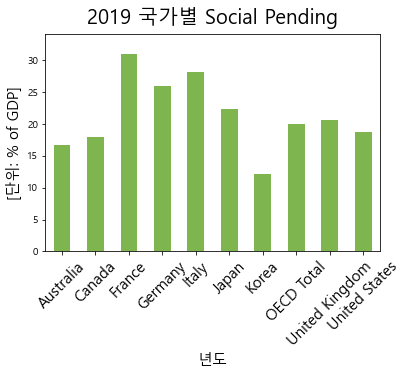

In [87]:
import numpy as np
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

if platform.system() == 'Windows':
	font_fname = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
	font_fname = r'/System/Library/Fonts/AppleGothic'
else:
	font_fname = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

font_family = fm.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family']=font_family

social_spending = welfare.getData('localhost', 'user0728', 'test1234', 'welfare', 'social_spending')
social_spending.set_index('country', inplace=True)
social_spending = social_spending.astype('float')
print(social_spending)

plt.figure(figsize=(10, 6), layout='constrained')
c = ['#7eb54e', '#7eb54e', 'orange', 'orange', 'orange', 'orange',
		 '#7eb54e', '#7eb54e', '#7eb54e', '#7eb54e' ]
social_spending.plot.bar(color=c, legend=False)
plt.title('2019 국가별 Social Pending', fontsize=20, pad=10)
plt.margins(0.1)
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('년도', fontsize=15)
plt.ylabel('[단위: % of GDP]', fontsize=15)
plt.show()
# plt.savefig('/Data/img/사회적지출비용 변화.png', dpi=200)

---
## 고용, 소득지원 현황

고용은 공통적으로 기업의 요구역량에 질적으로 매칭되도록 정부와 기업들이 청년 프로그램을 운영중

#### 국내
- 주거 부분, 생활비 부분 지원 많아
  - 월세 지원 정책
  - 소득 5천만원 이하 청년 자산형성 지원 등

#### 해외
- 핀란드, 네덜란드, 스위스, 캐나다, 미국 일부 **기본소득제도** 도입 실험
  - 세계에서 유일하게 기본소득제도를 운용하는 주 정부 보유 국가 **미국**
- 임시계약직, 파트타임 등 **다양한 형태의 고용관계**가 모든 국가에서 증가하는 추세
- ICT의 활용과 같은 측면에서 **노동 패턴의 변화** 수반
  - 정보기술을 뜻하는 IT(Information Technology)에 통신(Communication)이 합쳐져 기존의 IT 보다 좀 더 커뮤니케이션이 강조된 개념

#### 참조
- [대한민국시도지사협의회 해외행정우수사례](https://www.gaok.or.kr/gaok/bbs/B0000027/list.do?menuNo=200039)
- [해외 선진국가의 청년 일자리 정책과 지방정부의 역할](https://seoulsolution.kr/sites/default/files/%EC%84%B8%EA%B3%84%EC%99%80%EB%8F%84%EC%8B%9C15%ED%98%B8%20%ED%8A%B9%EC%A7%911.pdf)
- [Labour market change: New forms of employment: 2020 update](https://policy.nl.go.kr/search/searchDetail.do?rec_key=SH2_PLC20210271226)
- [기본소득 시행 국가](https://www.joongang.co.kr/article/24125960#home)

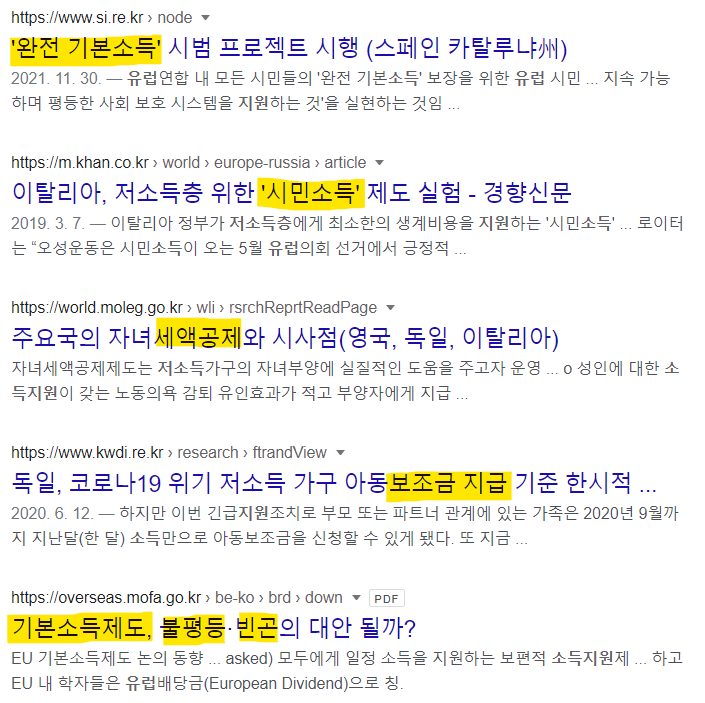

In [121]:
display.Image('Data/img/기본소득지원.png')

---
## 선별적 복지 VS 보편적 복지 떠나 제로섬게임 형태에서 벗어날 수 있을까?

- 미국을 제외한 유럽은 보편적 복지 추구, 한국은 선별적 복지 방향
- 고용률은 경기 순환에 민감하지만 장기적으로는 정부의 **고등 교육** 및 **소득 지원 정책**과 **여성 및 취약 계층의 고용을 촉진**하는 정책의 영향이 큼

__Q. 사람들이 현재 소득계층을 벗어나기 위해 가장 원하는건 뭘까?__